# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [ ]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [ ]:
filename="SUSYsmall.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta",
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA).

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [ ]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [ ]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [ ]:
Fisher.fit(X_Train,y_Train) # had to make some changes so ran this with the changes

ValueError: Input X contains NaN.
LinearDiscriminantAnalysis does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
## Google Colab's solution (did not work)
!pip install sklearn
import pandas as pd
import sklearn.discriminant_analysis as DA
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame and 'VarNames' is your list of variable names
# ... (your existing code) ...

# Create an imputer to replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your training data and transform it
X_Train = imputer.fit_transform(X_Train)

# Transform the testing data using the trained imputer
X_Test = imputer.transform(X_Test)

# Now you can fit the model
Fisher = DA.LinearDiscriminantAnalysis()
Fisher.fit(X_Train, y_Train)

# ... (rest of your code) ...

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


ValueError: Found array with 0 sample(s) (shape=(0, 18)) while a minimum of 1 is required by SimpleImputer.

In [ ]:
N_Train = int(len(df) * 0.8)  # Using  80% of data for training

Train_Sample = df[:N_Train]
Test_Sample = df[N_Train:]

X_Train = Train_Sample[VarNames[1:]]
y_Train = Train_Sample["signal"]

X_Test = Test_Sample[VarNames[1:]]
y_Test = Test_Sample["signal"]

Test_sig = Test_Sample[Test_Sample.signal == 1]
Test_bkg = Test_Sample[Test_Sample.signal == 0]

imputer = SimpleImputer(strategy='mean')

X_Train = imputer.fit_transform(X_Train)

X_Test = imputer.transform(X_Test)

Fisher = DA.LinearDiscriminantAnalysis()
Fisher.fit(X_Train, y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


ValueError: Input X contains NaN.
LinearDiscriminantAnalysis does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

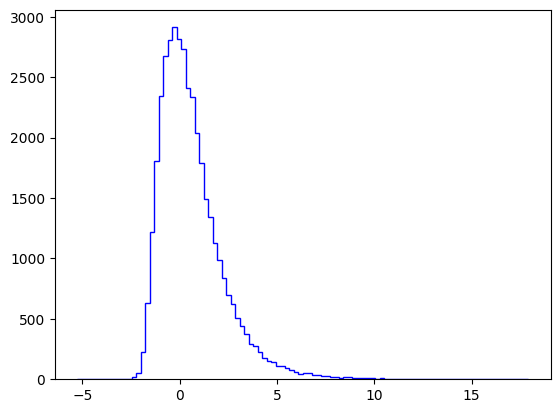

In [ ]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


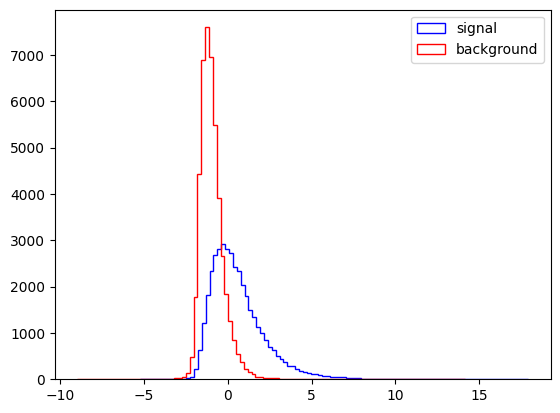

In [ ]:
import sklearn.discriminant_analysis as DA
from sklearn.impute import SimpleImputer


# had to use the mean to fill in NaN since that was the error we kept getting
imputer = SimpleImputer(strategy='mean')

X_Train = imputer.fit_transform(X_Train)

X_Test = imputer.transform(X_Test)

Test_sig_imputed = imputer.transform(Test_sig[VarNames[1:]])
Test_bkg_imputed = imputer.transform(Test_bkg[VarNames[1:]])

Fisher = DA.LinearDiscriminantAnalysis()
Fisher.fit(X_Train, y_Train)

plt.figure()
plt.hist(Fisher.decision_function(Test_sig_imputed),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg_imputed),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

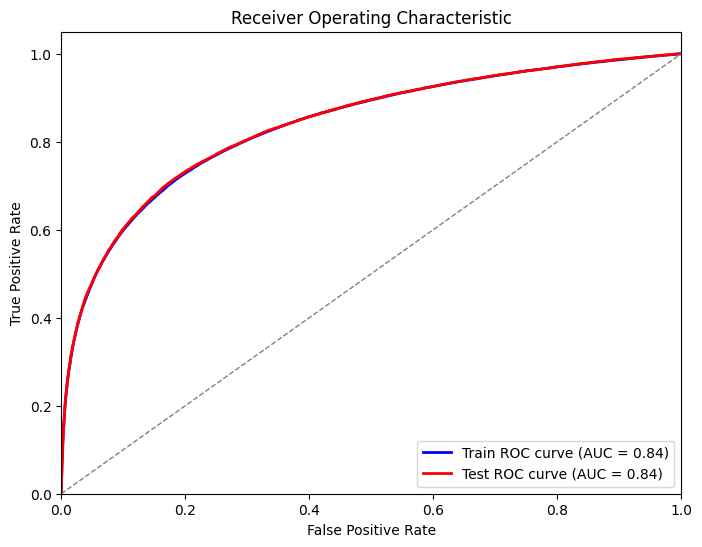

In [ ]:
## Part A


import sklearn.discriminant_analysis as DA
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer # Import SimpleImputer

Fisher=DA.LinearDiscriminantAnalysis() # This creates a LDA object
Train_Sample=df[:N_Train] # Training set
Test_Sample=df[N_Train:] # Testing set

# For the training set
X_Train=Train_Sample[VarNames[1:]] # This takes the features
y_Train=Train_Sample["signal"] # This is the target variable "signal"

# For the testing set
X_Test=Test_Sample[VarNames[1:]] # This takes the features
y_Test=Test_Sample["signal"] # This is the target variable

Fisher.fit(X_Train, y_Train) # Fits the LDA model with the training sets

# our imputation code from previous exercise
imputer = SimpleImputer(strategy='mean')
X_Train = imputer.fit_transform(X_Train)
X_Test = imputer.transform(X_Test)

# Now you can proceed with fitting the model and prediction
Fisher = DA.LinearDiscriminantAnalysis()
Fisher.fit(X_Train, y_Train)

# Probabilities for training and testing set samples
probs_train = Fisher.predict_proba(X_Train)[:, 1]
probs_test = Fisher.predict_proba(X_Test)[:, 1]

fpr_train, tpr_train, _=roc_curve(y_Train, probs_train) #  ROC curve (from Dr. Farbin's code)
roc_auc_train=auc(fpr_train, tpr_train) # calculate AUC curve for training

fpr_test, tpr_test, _=roc_curve(y_Test, probs_test) # ROC curve for testing
roc_auc_test=auc(fpr_test, tpr_test) # AUC curve for testing

# Plots ROC and AUC curves
plt.figure(figsize=(8, 6))
# The training curve
plt.plot(fpr_train, tpr_train, color="blue", lw=2, label="Train ROC curve (AUC = %0.2f)" % roc_auc_train)
# Testing curve
plt.plot(fpr_test, tpr_test, color="red", lw=2, label="Test ROC curve (AUC = %0.2f)" % roc_auc_test)
# Diagonal line
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot.

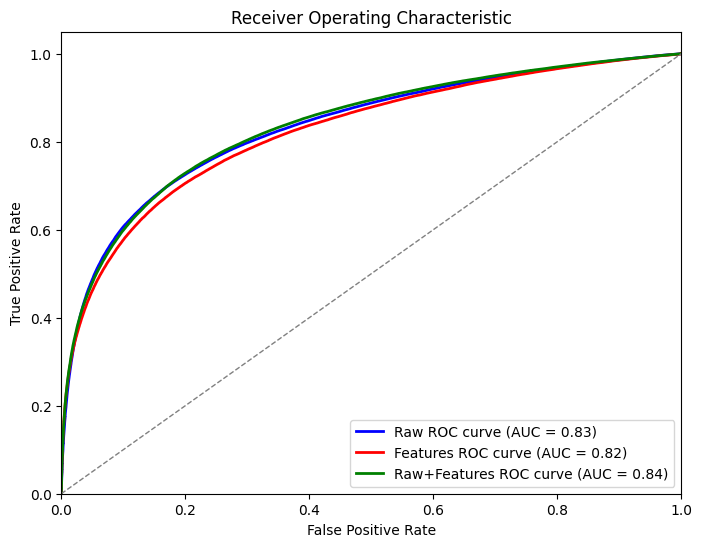

In [ ]:
import sklearn.discriminant_analysis as DA
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer # Import SimpleImputer

VarNames=["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel",
            "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))


imputer = SimpleImputer(strategy='mean')

X_raw_imputed = imputer.fit_transform(df[RawNames])
X_features_imputed = imputer.fit_transform(df[FeatureNames])
X_raw_and_features_imputed = imputer.fit_transform(df[VarNames[1:]])

X_raw = pd.DataFrame(X_raw_imputed, columns=RawNames)
X_features = pd.DataFrame(X_features_imputed, columns=FeatureNames)
X_raw_and_features = pd.DataFrame(X_raw_and_features_imputed, columns=VarNames[1:])

y=df["signal"]


Fisher_raw=DA.LinearDiscriminantAnalysis()
Fisher_features=DA.LinearDiscriminantAnalysis()
Fisher_raw_and_features=DA.LinearDiscriminantAnalysis()

# Fit (train) them, now with imputed data
Fisher_raw.fit(X_raw, y)
Fisher_features.fit(X_features, y)
Fisher_raw_and_features.fit(X_raw_and_features, y)

probs_raw=Fisher_raw.predict_proba(X_raw)[:, 1]
probs_features=Fisher_features.predict_proba(X_features)[:, 1]
probs_raw_and_features=Fisher_raw_and_features.predict_proba(X_raw_and_features)[:, 1]

# ROC and AUC curves for raw, features, and raw features
fpr_raw, tpr_raw, _=roc_curve(y, probs_raw)
roc_auc_raw=auc(fpr_raw, tpr_raw)
fpr_features, tpr_features, _=roc_curve(y, probs_features)
roc_auc_features=auc(fpr_features, tpr_features)
fpr_raw_and_features, tpr_raw_and_features, _=roc_curve(y, probs_raw_and_features)
roc_auc_raw_and_features=auc(fpr_raw_and_features, tpr_raw_and_features)

# Plot ROC curves
plt.figure(figsize=(8, 6))
# For raw
plt.plot(fpr_raw, tpr_raw, color='blue', lw=2, label='Raw ROC curve (AUC = %0.2f)' % roc_auc_raw)
# Features
plt.plot(fpr_features, tpr_features, color='red', lw=2, label='Features ROC curve (AUC = %0.2f)' % roc_auc_features)
# Raw Features
plt.plot(fpr_raw_and_features, tpr_raw_and_features, color='green', lw=2, label='Raw+Features ROC curve (AUC = %0.2f)' % roc_auc_raw_and_features)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 7.

In [ ]:
## Part A
# I wanted to use logistic regression, decision tree, and KNN since I know
# a lot more about these techniques

In [ ]:
## Part B
import sklearn.linear_model as LM # logistic regression
import sklearn.tree as tree # decision tree
import sklearn.neighbors as NN # k nearest neighbors
import sklearn.metrics as metrics

def compare_roc(classifier, X, y):
    classifier.fit(X, y)
    probs=classifier.predict_proba(X)[:, 1] # predicts the probabilities of the test
    fpr, tpr, _=metrics.roc_curve(y, probs) # calculates ROC curve
    roc_auc=metrics.auc(fpr, tpr) # calculates AUC curve

    return fpr, tpr, roc_auc

decision_tree=tree.DecisionTreeClassifier()
logistic_regression=LM.LogisticRegression()
knn_classifier=NN.KNeighborsClassifier()

classifiers=[
    decision_tree,
    logistic_regression,
    knn_classifier
]


classifier_names=[
    "Decision Tree",
    "Logistic Regression",
    "KNN"
]

all_fprs, all_tprs, all_aucs=[], [], []

In [24]:
## Could not get this to work so used Google Colab for help

print("Number of features in X_raw:", X_raw.shape[1])
print("Number of features in X_test:", X_Test.shape[1])
print("Feature names in X_raw:", X_raw.columns.tolist())
# The following line was causing the error because X_Test is a NumPy array, not a DataFrame.
# print("Feature names in X_test:", X_Test.columns.tolist())
# Instead, you can print the shape or data type of X_Test to get information about it:
print("Shape of X_test:", X_Test.shape)
# or
print("Data type of X_test:", type(X_Test))
missing_features = ['MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1']

for feature in missing_features:
    X_raw[feature] = 0

# Get column names from VarNames (assuming VarNames[1:] are the feature names)
X_Test_columns = VarNames[1:]
X_raw = X_raw[X_Test_columns]

# If you need to access column names, convert X_Test to a DataFrame first:
X_Test_df = pd.DataFrame(X_Test, columns=VarNames[1:])
print("Feature names in X_test:", X_Test_df.columns.tolist())

Number of features in X_raw: 18
Number of features in X_test: 18
Feature names in X_raw: ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1']
Shape of X_test: (85544, 18)
Data type of X_test: <class 'numpy.ndarray'>
Feature names in X_test: ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1']


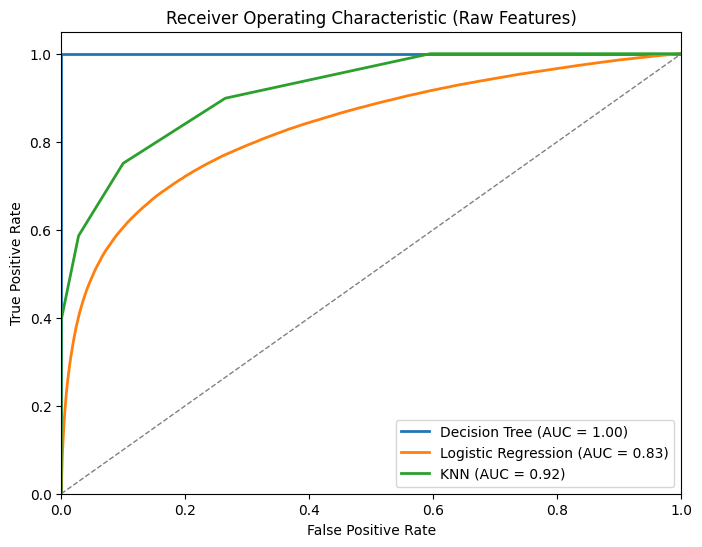

In [27]:
## This is taking forever to load and I don't know why
## It finally loaded but I want to use the test columns
plt.figure(figsize=(8, 6))
for classifier, name in zip(classifiers, classifier_names):
    fpr, tpr, roc_auc=compare_roc(classifier, X_raw, y)
    all_fprs.append(fpr)
    all_tprs.append(tpr)
    all_aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label="%s (AUC = %0.2f)" % (name, roc_auc))

plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (Raw Features)")
plt.legend(loc="lower right")
plt.show()


In [25]:
# Part C

import numpy as np

def compute_significance(N_S, N_B):
    return N_S / np.sqrt(N_S + N_B)

scenarios=[
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

decision_tree=tree.DecisionTreeClassifier()

for N_S, N_B in scenarios:
    print(f"\nScenario: N_S = {N_S}, N_B = {N_B}")
    decision_tree.fit(X_raw, y)
    probs=decision_tree.predict_proba(X_Test)[:, 1]
    y_pred=(probs>0.5).astype(int)
    true_positives=np.sum((y_Test==1) & (y_pred==1))
    false_positives=np.sum((y_Test==0) & (y_pred==1))

    significance=compute_significance(true_positives, false_positives)
    print(f"Decision Tree: Significance = {significance:.4f}")


Scenario: N_S = 10, N_B = 100


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Decision Tree: Significance = 198.6026

Scenario: N_S = 100, N_B = 1000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Decision Tree: Significance = 198.6026

Scenario: N_S = 1000, N_B = 10000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Decision Tree: Significance = 198.6026

Scenario: N_S = 10000, N_B = 100000
Decision Tree: Significance = 198.6026


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

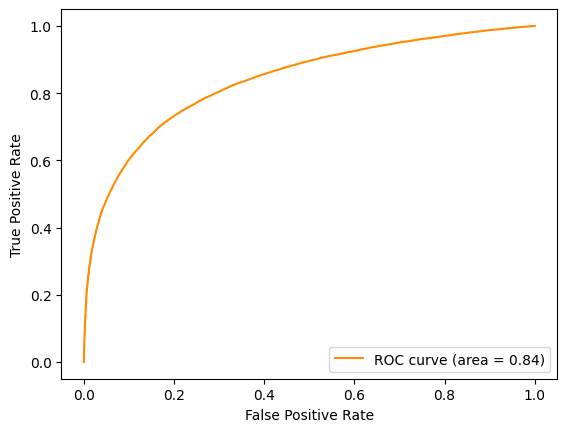

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance.


In [26]:
## Part B; we're gonna use decision tree because it has the best AUC score of 1

import pandas as pd
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score

def compute_max_significance(N_S, N_B): # This function finds the maximum significance value
    return N_S / np.sqrt(N_S + N_B)

# store the results
results = pd.DataFrame(columns=['Scenario', 'TPR', 'FPR', 'AUC', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'Max Significance'])


for i, (N_S, N_B) in enumerate(scenarios):
    decision_tree.fit(X_Train, y_Train) # Same thing as before with this training/fitting the classifier
    y_pred = decision_tree.predict(X_Test) # This makes the predictions

    # This part computes all the evaluation metrics; TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy
    # for my decision tree model for each scenario
    fpr, tpr, _ = roc_curve(y_Test, y_pred)
    roc_auc = auc(fpr, tpr)
    precision = precision_score(y_Test, y_pred)
    recall = recall_score(y_Test, y_pred)
    f1 = f1_score(y_Test, y_pred)
    accuracy = accuracy_score(y_Test, y_pred)

    max_significance = compute_max_significance(N_S, N_B) # max significance for each scenario

    results.loc[i] = [f"Scenario {i+1}", tpr, fpr, roc_auc, precision, recall, f1, accuracy, max_significance] # This will add the results to my dataframe

print(results)

     Scenario                             TPR  \
0  Scenario 1  [0.0, 0.6960170372436174, 1.0]   
1  Scenario 2  [0.0, 0.6945719139010724, 1.0]   
2  Scenario 3   [0.0, 0.698070633572497, 1.0]   
3  Scenario 4  [0.0, 0.6961691554902011, 1.0]   

                               FPR       AUC  Precision    Recall  F1 Score  \
0  [0.0, 0.26747792889525174, 1.0]  0.714270   0.690051  0.696017  0.693021   
1  [0.0, 0.26756469490900414, 1.0]  0.713504   0.689537  0.694572  0.692045   
2  [0.0, 0.26823713151558537, 1.0]  0.714917   0.690075  0.698071  0.694050   
3   [0.0, 0.2678033014468233, 1.0]  0.714183   0.689838  0.696169  0.692989   

   Accuracy  Max Significance  
0  0.715690          0.953463  
1  0.714977          3.015113  
2  0.716228          9.534626  
3  0.715585         30.151134  
